# Problem Set #6
## Name: Weiwei Zheng

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
import graphviz

In [2]:
biden = pd.read_csv('biden.csv', sep=',')

In [3]:
biden.isnull().sum()

biden     0
female    0
age       0
educ      0
dem       0
rep       0
dtype: int64

In [4]:
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


***a) fit a binary tree***

In [5]:
y = biden['biden'].values
X = biden[biden.columns.difference(['biden'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 
                                   .3, random_state = 0)

In [6]:
X.head()

,age,dem,educ,female,rep
0,19,1,12,0,0
1,51,1,14,1,0
2,27,0,14,0,0
3,43,1,14,1,0
4,38,0,14,1,1


In [7]:
FEATURES = ['age', 'dem', 'educ', 'female', 'rep']

In [8]:
tree1 = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

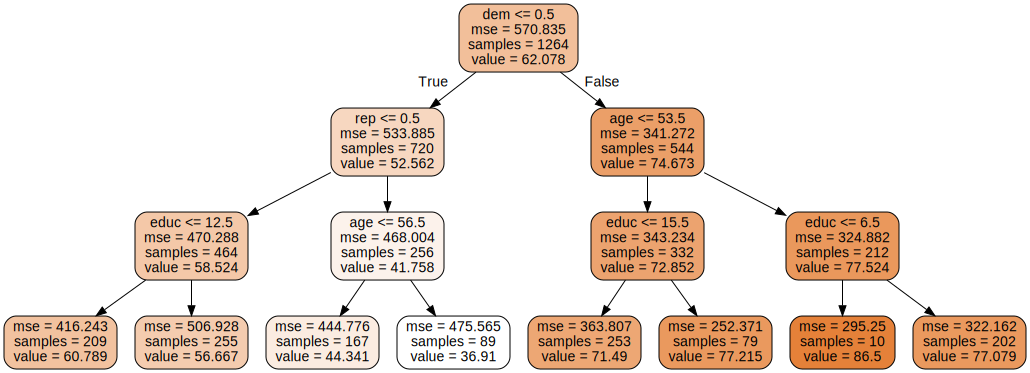

In [9]:
tree1_viz = export_graphviz(tree1, out_file = None, 
                            rounded = True, filled = True,
                            feature_names = FEATURES)
graph = graphviz.Source(tree1_viz)
graph.render('tree1')
graph

The first split is on being democratic or not, and democratics seem to be warmer to bidens. The second split is on being a republican or not and age. For non-democratics, if they are republicans, they would be colder to bidens. For democratics, if they are older than 53.5, they would be warmer to bidens. The third split is on education and age. And there's no general pattern among the four subgroups.

In [10]:
y_pred = tree1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 370.051290373


***b) optimal tree ***

In [11]:
MSE_opt = MSE1
level_list = []
for i in range(1, 1000):
    tree = DecisionTreeRegressor(max_depth = i, min_samples_leaf = 5)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_opt = min(MSE, MSE_opt) 
    if MSE_opt == MSE:
        level_list.append((i, MSE))

In [12]:
level_list

[(2, 365.31209671596878)]

In [13]:
print("optimal level:", level_list[0][0], ", MSE = ", level_list[0][1] )

optimal level: 2 , MSE =  365.312096716


The pruning imporves MSE in part a). 

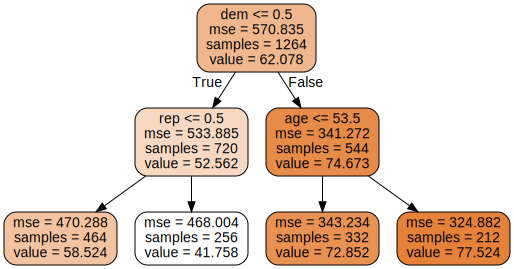

In [14]:
tree_opt = DecisionTreeRegressor(max_depth = 2, min_samples_leaf = 5)
tree_opt.fit(X_train, y_train)
tree_opt_viz = export_graphviz(tree_opt, out_file = None, 
                               rounded = True, filled = True,
                               feature_names = FEATURES)
graph = graphviz.Source(tree_opt_viz)
graph.render('tree_opt')
graph

The first split is still being democratic or not, with democratic being warmer to biden. 
For non-democratics, the second split is on being republican or not. If they are republicans, they would be colder to bidens. For democratics, the second split is on age. If they are older than 53.5, they would be warmer to bidens. 

***c) Bagging ***

In [15]:
tree_bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 100, \
                            max_samples = 100, bootstrap = True, \
                            oob_score = True, random_state = 0)
tree_bag.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

In [16]:
y_pred_bag = tree_bag.oob_prediction_
MSE_bag = mean_squared_error(y, y_pred_bag)
print('MSE_bagging = ', MSE_bag)

MSE_bagging =  404.215874174


variable importance

In [17]:
importances = np.mean([tree.feature_importances_ for \
                               tree in tree_bag.estimators_], axis=0)
ranks = np.argsort(importances)[::-1]

In [18]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f + 1, ". ", FEATURES[ranks[f]], ": ", importances[ranks[f]])


Feature ranking:
1 .  age :  0.440171003151
2 .  educ :  0.201081226061
3 .  dem :  0.189574875152
4 .  rep :  0.107749413743
5 .  female :  0.061423481893


Age is the most important variable which explains 43 percent of the variance and is followed by education, democraic, republican, and gender. 

***d) Random Forest ***

In [19]:
tree_random = RandomForestRegressor(n_estimators = 53, max_features='sqrt', bootstrap=True,
                                  oob_score=True, random_state=15)
hit_tree4.fit(X, y)

hit_tree4.score(X, y)
y_pred4 = hit_tree4.oob_prediction_
MSE4 = mean_squared_error(y, y_pred4)
print('MSE=', MSE4)

NameError: name 'hit_tree4' is not defined

In [ ]:
def get_error_and_importance(i):
    tree_random = RandomForestRegressor(n_estimators = 100, \
                  max_features = i, bootstrap = True,\
                  oob_score = True, random_state = 0)
    tree_random.fit(X, y)
    y_pred = tree_random.oob_prediction_
    mse = mean_squared_error(y, y_pred)
    print('MSE =', mse)
    
    importances = tree_random.feature_importances_  
    ranks = np.argsort(importances)[::-1] 
    for f in range(X.shape[1]):
        print(f + 1, ". ", FEATURES[ranks[f]], ": ", importances[ranks[f]])
    
    return       

In [ ]:
for i in range(1, 4):
    print('m = ', i)
    get_error_and_importance(i)
    print('\n')

As m gets larger, MSE gets smaller. As for variable importance, age is always the most important variable which explain around half of the variance, followed by dem, educ, rep, and female. 